# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [55]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)






In [56]:
# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [57]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i]

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
       # city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
     
     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
    # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la'ie
Processing Record 2 of Set 1 | palikir - national government center
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | celestun
Processing Record 8 of Set 1 | bikenibeu village
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | wuwei
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | novo oriente
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | laojunmiao
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 18 of Set 1 | mansa
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | rawson
Processing Record 21 of Set 1 | b

Processing Record 41 of Set 4 | eydhafushi
Processing Record 42 of Set 4 | hilo
Processing Record 43 of Set 4 | polyarnyy
Processing Record 44 of Set 4 | mishan
Processing Record 45 of Set 4 | ratnagiri
Processing Record 46 of Set 4 | dolisie
Processing Record 47 of Set 4 | baiti
Processing Record 48 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 49 of Set 4 | tsiombe
Processing Record 50 of Set 4 | rongelap
Processing Record 1 of Set 5 | walvis bay
Processing Record 2 of Set 5 | porto franco
Processing Record 3 of Set 5 | chernyshevskiy
Processing Record 4 of Set 5 | bereeda
Processing Record 5 of Set 5 | westport
Processing Record 6 of Set 5 | charikar
Processing Record 7 of Set 5 | nagqu
Processing Record 8 of Set 5 | naha
Processing Record 9 of Set 5 | angaur state
Processing Record 10 of Set 5 | zayed city
Processing Record 11 of Set 5 | karratha
Processing Record 12 of Set 5 | fale old settlement
Processing Record 13 of Set 5 | ust-nera
Processing Record 14 of

Processing Record 36 of Set 8 | maksatikha
Processing Record 37 of Set 8 | yarmouth
Processing Record 38 of Set 8 | valday
Processing Record 39 of Set 8 | hanceville
Processing Record 40 of Set 8 | santo antonio
Processing Record 41 of Set 8 | tapa
Processing Record 42 of Set 8 | cabugao
Processing Record 43 of Set 8 | itapirapua
Processing Record 44 of Set 8 | porto novo
Processing Record 45 of Set 8 | springbok
Processing Record 46 of Set 8 | malango
Processing Record 47 of Set 8 | mahanoro
Processing Record 48 of Set 8 | ola
Processing Record 49 of Set 8 | howrah
Processing Record 50 of Set 8 | veinticinco de mayo
Processing Record 1 of Set 9 | varva
Processing Record 2 of Set 9 | saint-pol-de-leon
Processing Record 3 of Set 9 | ugoofaaru
Processing Record 4 of Set 9 | ploneour-lanvern
Processing Record 5 of Set 9 | baoding
Processing Record 6 of Set 9 | beloslav
Processing Record 7 of Set 9 | calama
Processing Record 8 of Set 9 | undurkhaan
Processing Record 9 of Set 9 | sisimiut
P

Processing Record 25 of Set 12 | masterton
Processing Record 26 of Set 12 | igunga
Processing Record 27 of Set 12 | ottawa
Processing Record 28 of Set 12 | korhogo
Processing Record 29 of Set 12 | cape canaveral
Processing Record 30 of Set 12 | rabo de peixe
Processing Record 31 of Set 12 | labrador city
Processing Record 32 of Set 12 | jolo
Processing Record 33 of Set 12 | sorong
Processing Record 34 of Set 12 | torghay
Processing Record 35 of Set 12 | wulingyuan
Processing Record 36 of Set 12 | kasempa
Processing Record 37 of Set 12 | kimbe
Processing Record 38 of Set 12 | belyy yar
Processing Record 39 of Set 12 | kone
Processing Record 40 of Set 12 | palmer
Processing Record 41 of Set 12 | pereslavl'-zalesskiy
Processing Record 42 of Set 12 | marica
Processing Record 43 of Set 12 | koneurgench
City not found. Skipping...
Processing Record 44 of Set 12 | takamaka
City not found. Skipping...
Processing Record 45 of Set 12 | bubaque
Processing Record 46 of Set 12 | mount isa
Processin

In [62]:
# Tally the number of cities in the city_data array of dictionaries
len(city_data)

573

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la'ie,21.6477,-157.9253,23.98,92,74,3.25,US,1682619755
1,palikir - national government center,6.9248,158.1611,26.41,89,100,2.57,FM,1682619755
2,atafu village,-8.5421,-172.5159,28.56,72,100,5.98,TK,1682619755
3,olonkinbyen,70.9221,-8.7187,-1.25,96,99,10.08,SJ,1682619756
4,longyearbyen,78.2186,15.6401,-2.09,74,75,7.20,SJ,1682619756


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/kenuzb/week6/python-api-challenge/WeatherPy/output_data/cities.csv", index_label="City_ID")
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rio gallegos,-51.6226,-69.2181,10.03,66,40,10.80,AR,1682616867
1,jamestown,42.0970,-79.2353,14.73,39,0,2.06,US,1682616707
2,chodavaram,17.8333,82.9500,25.91,69,52,1.20,IN,1682616867
3,prince george,53.9166,-122.7530,7.92,47,0,4.63,CA,1682616740
4,nova sintra,14.8667,-24.7167,20.00,77,37,6.77,CV,1682616868
...,...,...,...,...,...,...,...,...,...
534,krutinka,56.0055,71.5113,16.85,32,99,7.92,RU,1682616999
535,masuguru,-11.3667,38.4167,24.07,71,44,1.16,TZ,1682616999
536,lubang,13.8584,120.1240,27.65,78,3,8.20,PH,1682617000


In [52]:
# Read saved data
city_data_df = pd.read_csv("/Users/kenuzb/week6/python-api-challenge/WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rio gallegos,-51.6226,-69.2181,10.03,66,40,10.80,AR,1682616867
1,jamestown,42.0970,-79.2353,14.73,39,0,2.06,US,1682616707
2,chodavaram,17.8333,82.9500,25.91,69,52,1.20,IN,1682616867
3,prince george,53.9166,-122.7530,7.92,47,0,4.63,CA,1682616740
4,nova sintra,14.8667,-24.7167,20.00,77,37,6.77,CV,1682616868


In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

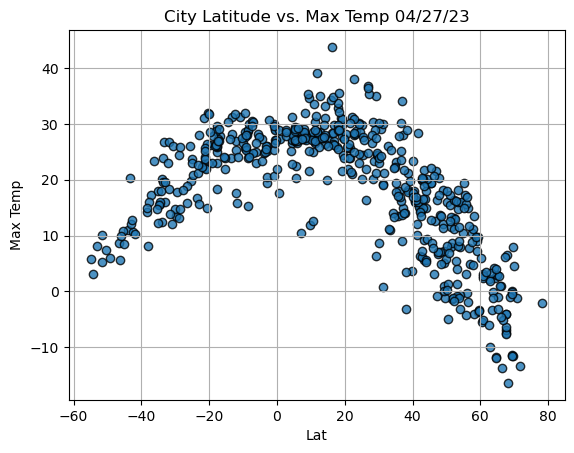

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temp "+ time.strftime("%x"))
plt.ylabel("Max Temp")
plt.xlabel("Lat")
plt.grid(True)
# Save the figure
plt.savefig("/Users/kenuzb/week6/python-api-challenge/WeatherPy/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

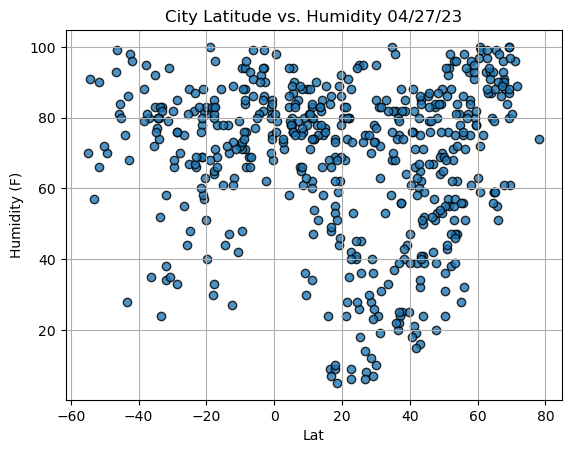

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (F)")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kenuzb/week6/python-api-challenge/WeatherPy/output_data/Fig2.png")

# Show plot
plt.show()

In [31]:
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#### Latitude Vs. Cloudiness

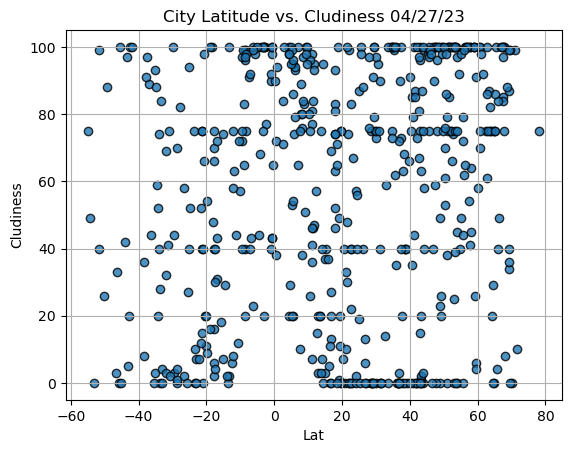

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cludiness "+ time.strftime("%x"))
plt.ylabel("Cludiness")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kenuzb/week6/python-api-challenge/WeatherPy/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

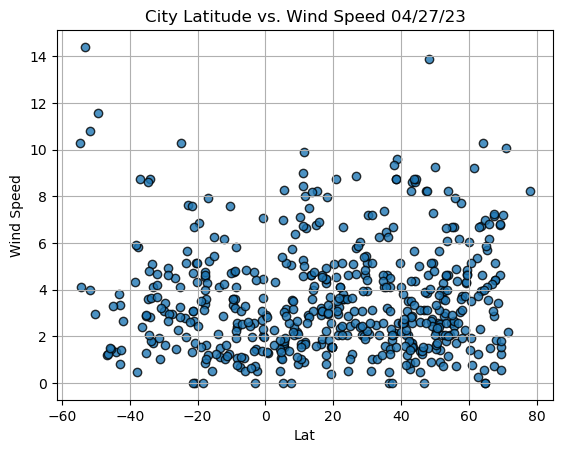

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig("/Users/kenuzb/week6/python-api-challenge/WeatherPy/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Lat')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,14.73,39,0,2.06,US,1682616707
2,chodavaram,17.8333,82.9500,25.91,69,52,1.20,IN,1682616867
3,prince george,53.9166,-122.7530,7.92,47,0,4.63,CA,1682616740
4,nova sintra,14.8667,-24.7167,20.00,77,37,6.77,CV,1682616868
6,berezovyy,51.6667,135.7000,-1.37,94,100,1.39,RU,1682616868


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rio gallegos,-51.6226,-69.2181,10.03,66,40,10.80,AR,1682616867
5,bredasdorp,-34.5322,20.0403,15.73,77,59,3.59,ZA,1682616858
8,punta arenas,-53.1500,-70.9167,8.06,57,0,14.40,CL,1682616577
9,port-aux-francais,-49.3500,70.2167,6.05,70,88,11.55,TF,1682616869
10,adamstown,-25.0660,-130.1015,23.78,67,94,3.24,PN,1682616869


###  Temperature vs. Latitude Linear Regression Plot

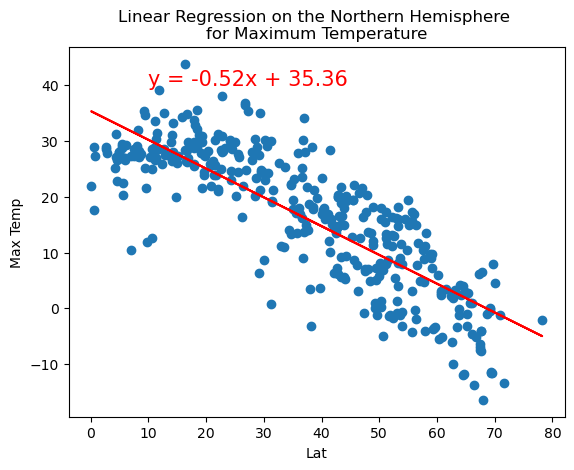

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

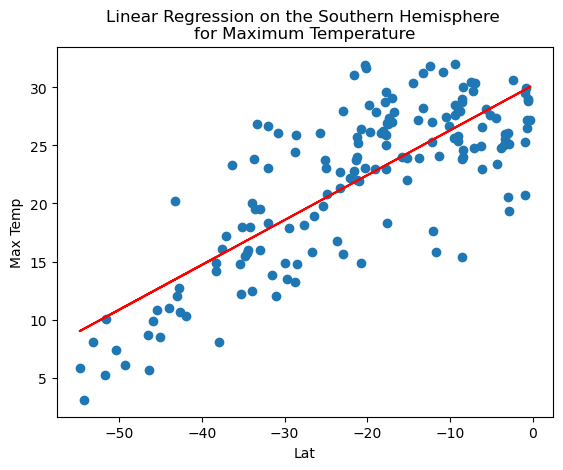

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

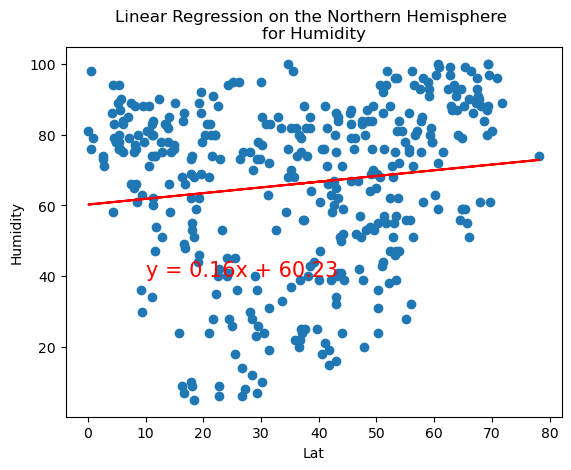

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Humidity', 'Humidity',(10,40))

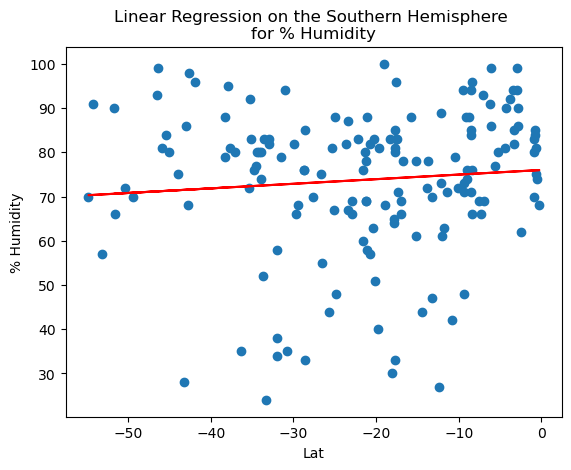

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

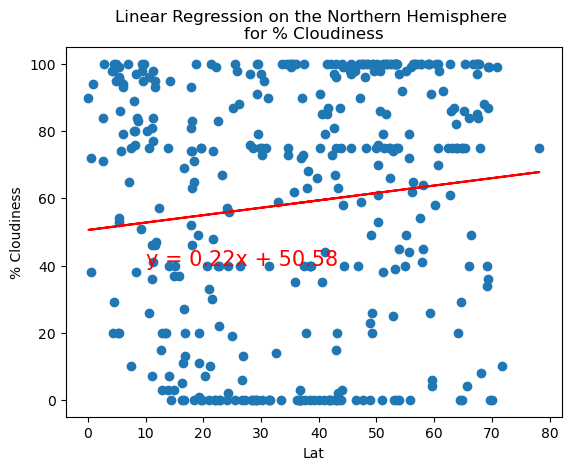

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

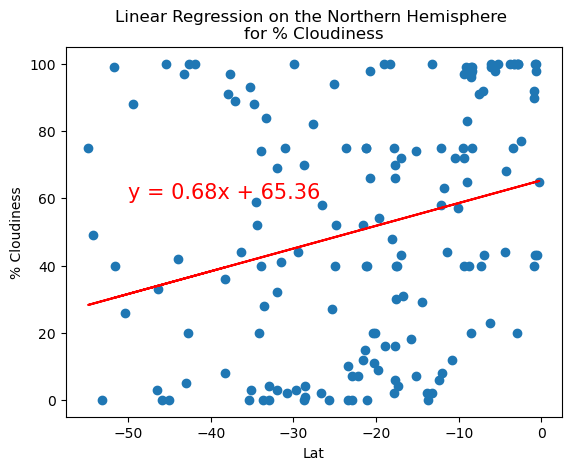

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

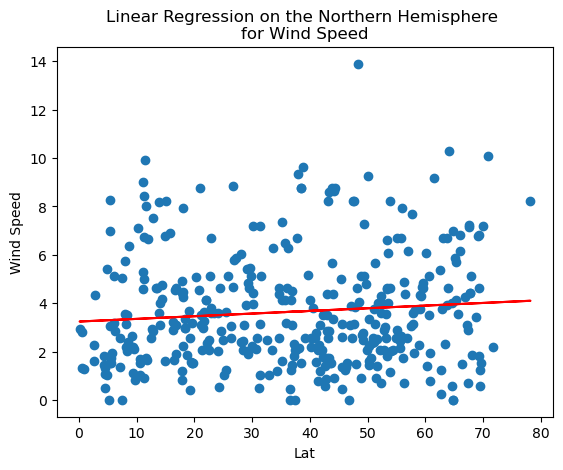

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

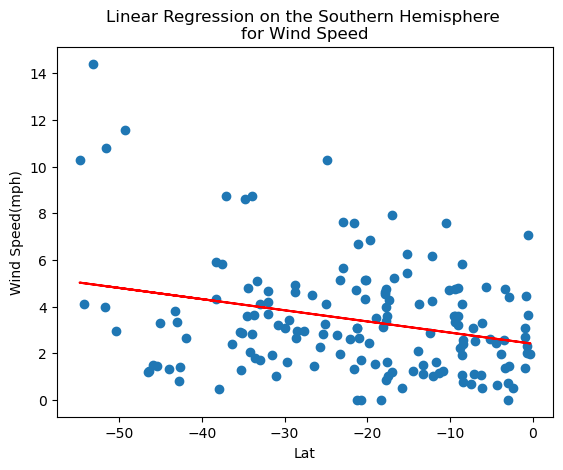

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE